****Caso: pruebas de bondad de ajuste****

Entregado por: Grupo 28 - 
Carlos Gutierrez - 
D'sharlie Sanchez

Acontinuacion se realiza el análisis del caso del Aeropuerto Internacional El Morado, con pruebas de bondad de ajuste

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns


In [46]:
# Carga de datos
data_aviones = pd.read_excel('Datos-Caso-III.xlsx', sheet_name='DatosLlegadaAviones')
data_aviones

,Fecha de Llegada,Tipo de Avión
0,2023-05-01 00:00:00.000,Mediano
1,2023-05-01 00:12:48.533,Grande
2,2023-05-01 00:20:31.919,Mediano
3,2023-05-01 00:31:48.641,Pequeño
4,2023-05-01 00:40:09.796,Pequeño
...,...,...
4369,2023-05-21 11:23:32.467,Grande
4370,2023-05-21 11:26:41.424,Mediano
4371,2023-05-21 11:30:38.033,Pequeño
4372,2023-05-21 11:34:33.324,Mediano


## PUNTO A

 Tiempo entre arribos de un avión desde un destino internacional para cada una de las siguientes franjas cuatro horarias: (6:00 am – 11:00 am; 11:00 am – 3:00 pm; 3:00 pm – 9:00 pm; 9:00 pm – 6:00 am) 

In [47]:
# Asegúrate de que los datos estén ordenados por 'Fecha de Llegada'
data_aviones.sort_values('Fecha de Llegada', inplace=True)

# Calcular la diferencia de tiempo entre arribos consecutivos
data_aviones['Tiempo entre arribos'] = data_aviones['Fecha de Llegada'].diff().dt.total_seconds() / 60  # Convertir a minutos

# Eliminar el primer valor NaN resultante del cálculo diff()
data_aviones.dropna(subset=['Tiempo entre arribos'], inplace=True)


In [48]:
# Definir las franjas horarias
def asignar_franja_horaria(fecha):
    hora = fecha.hour
    if 6 <= hora < 11:
        return '6:00 am - 11:00 am'
    elif 11 <= hora < 15:
        return '11:00 am - 3:00 pm'
    elif 15 <= hora < 21:
        return '3:00 pm - 9:00 pm'
    else:
        return '9:00 pm - 6:00 am'

# Aplicar la función para asignar franjas horarias
data_aviones['Franja Horaria'] = data_aviones['Fecha de Llegada'].apply(asignar_franja_horaria)

# Crear dataframes filtrados por franja horaria
df_6_11 = data_aviones[data_aviones['Franja Horaria'] == '6:00 am - 11:00 am']
df_11_15 = data_aviones[data_aviones['Franja Horaria'] == '11:00 am - 3:00 pm']
df_15_21 = data_aviones[data_aviones['Franja Horaria'] == '3:00 pm - 9:00 pm']
df_21_6 = data_aviones[data_aviones['Franja Horaria'] == '9:00 pm - 6:00 am']


**Análisis franja horaria de 6:00 am - 11:00 am**

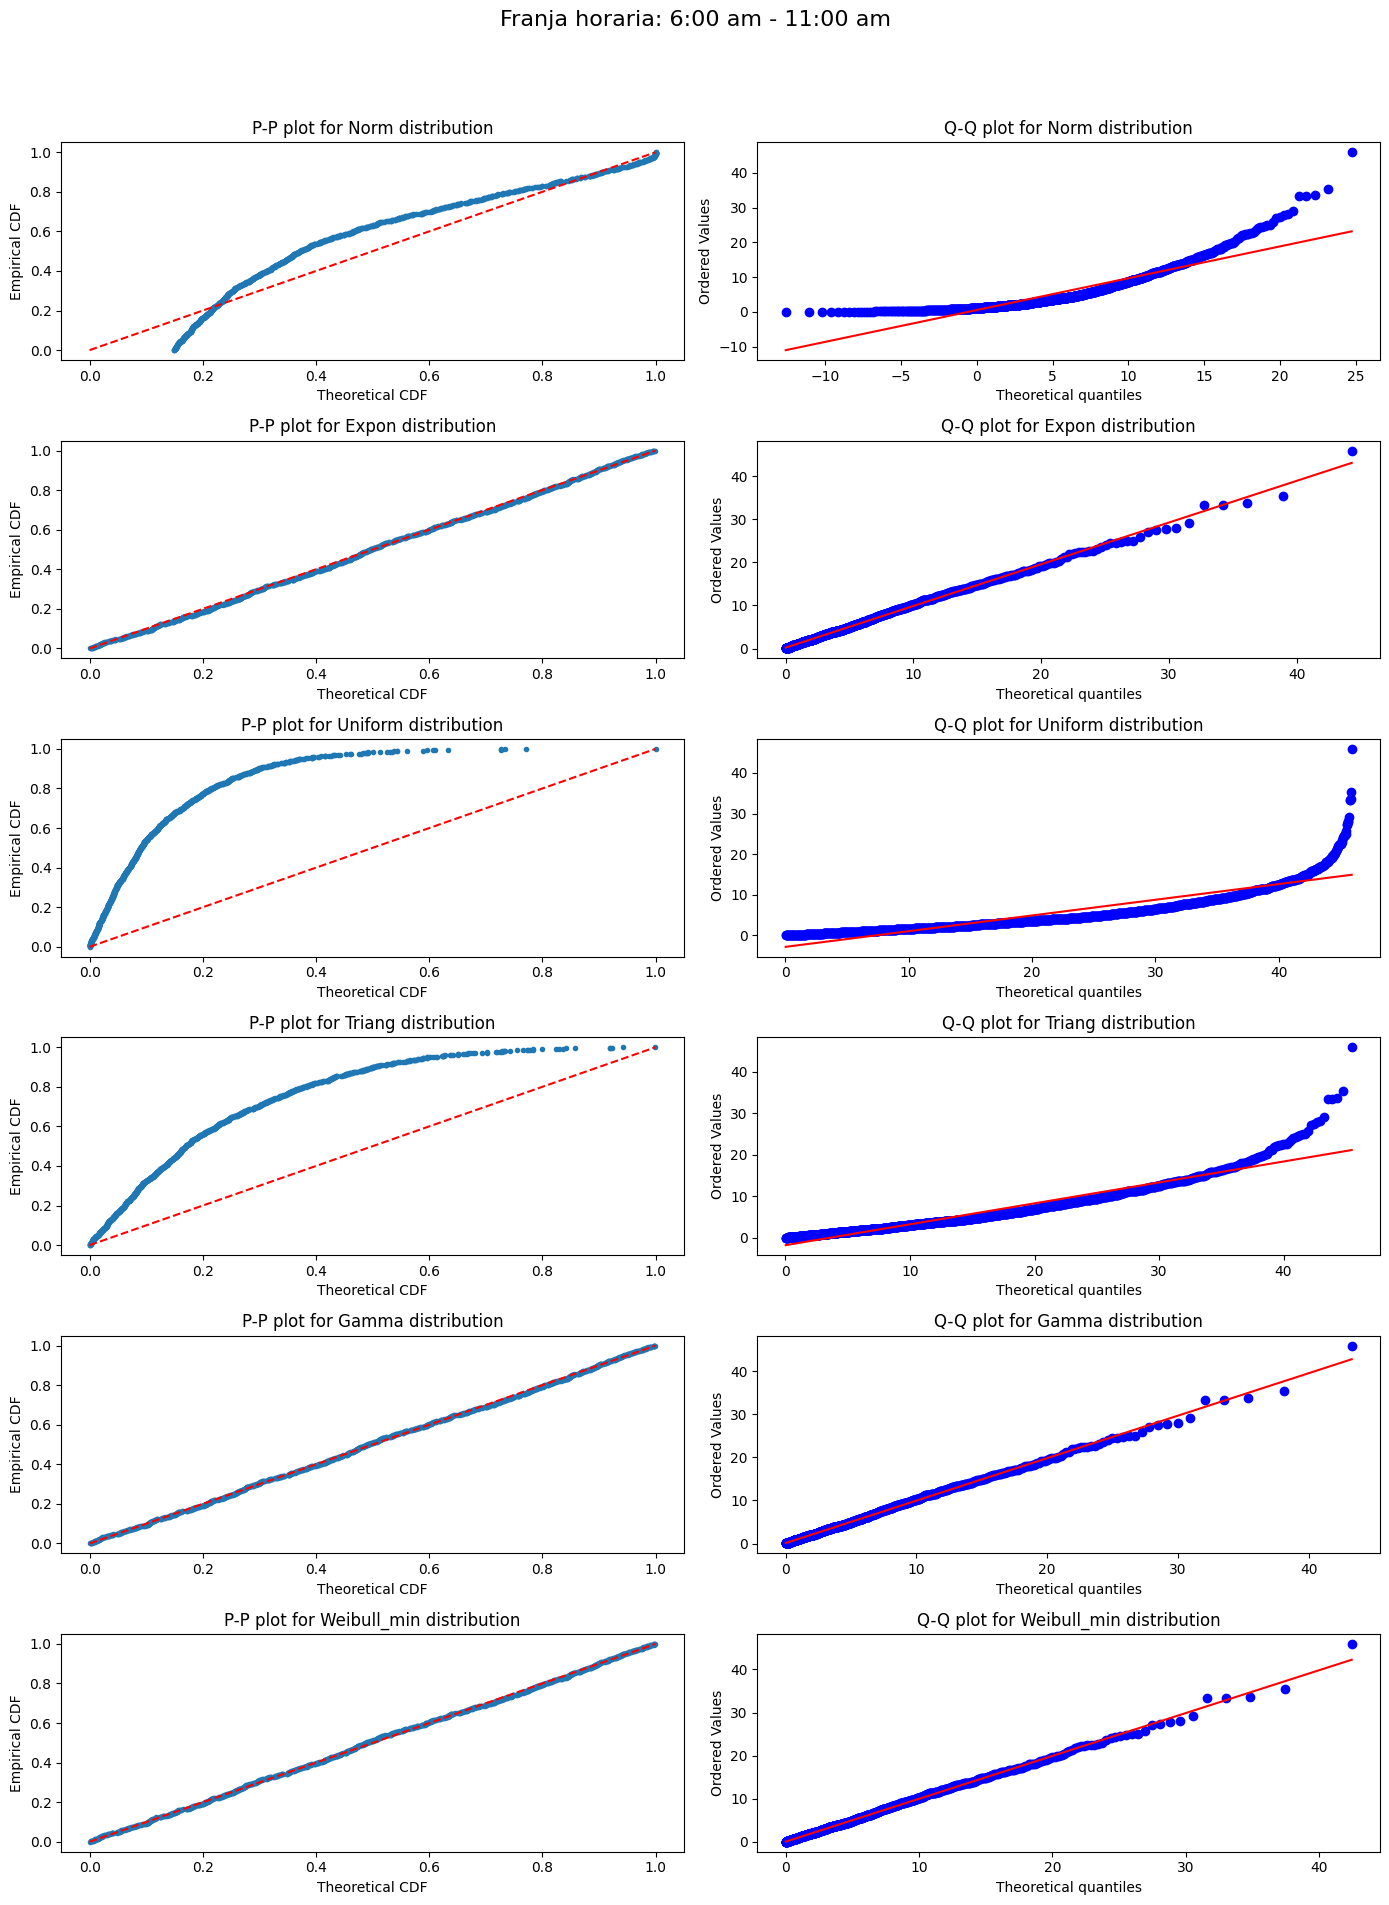

Distribución Norm:
  KS stat: 0.149, p-value KS: 0.000
  Chi-Square stat: 61131403.865, p-value Chi: 0.000

Distribución Expon:
  KS stat: 0.020, p-value KS: 0.810
  Chi-Square stat: 24.438, p-value Chi: 0.886

Distribución Uniform:
  KS stat: 0.603, p-value KS: 0.000
  Chi-Square stat: 2843.015, p-value Chi: 0.000

Distribución Triang:
  KS stat: 0.422, p-value KS: 0.000
  Chi-Square stat: 1089.069, p-value Chi: 0.000

Distribución Gamma:
  KS stat: 0.015, p-value KS: 0.975
  Chi-Square stat: 25.064, p-value Chi: 0.867

Distribución Weibull_min:
  KS stat: 0.017, p-value KS: 0.932
  Chi-Square stat: 26.506, p-value Chi: 0.817




In [49]:
# Codigo para analizar la franja horaria de 6:00 am - 11:00 am
data_franja = df_6_11['Tiempo entre arribos']

# Lista de distribuciones a probar
distributions = ['norm', 'expon', 'uniform', 'triang', 'gamma', 'weibull_min']

# Funciones para gráficos P-P y Q-Q
def pp_plot(data, dist_name, params, ax):
    """
    Function to create a P-P plot for the given data and distribution.
    """
    ecdf = np.arange(1, len(data)+1) / len(data)
    theoretical_cdf = getattr(stats, dist_name).cdf(np.sort(data), *params)
    ax.plot(theoretical_cdf, ecdf, marker='o', linestyle='', markersize=3)
    ax.plot([0, 1], [0, 1], linestyle='--', color='red')
    ax.set_title(f'P-P plot for {dist_name.capitalize()} distribution')
    ax.set_xlabel('Theoretical CDF')
    ax.set_ylabel('Empirical CDF')

def qq_plot(data, dist_name, params, ax):
    """
    Function to create a Q-Q plot for the given data and distribution.
    """
    stats.probplot(data, dist=dist_name, sparams=params, plot=ax)
    ax.set_title(f'Q-Q plot for {dist_name.capitalize()} distribution')

# Crear gráficos para cada distribución
fig, axes = plt.subplots(len(distributions), 2, figsize=(14, 20))
fig.suptitle('Franja horaria: 6:00 am - 11:00 am', fontsize=16)

results_text = ""

for i, dist_name in enumerate(distributions):
    # Ajuste de distribución
    params = getattr(stats, dist_name).fit(data_franja)
    
    # Prueba KS
    ks_stat, p_value_ks = stats.kstest(data_franja, dist_name, args=params)
    
    # Prueba Chi-Cuadrado
    observed_freq, bin_edges = np.histogram(data_franja, bins='auto')
    expected_freq = len(data_franja) * np.diff(getattr(stats, dist_name).cdf(bin_edges, *params))
    
    # Normalizar las frecuencias esperadas para que coincidan con la suma de las observadas
    expected_freq = expected_freq * observed_freq.sum() / expected_freq.sum()
    
    chi_stat, p_value_chi = stats.chisquare(f_obs=observed_freq, f_exp=expected_freq)
    
    # Graficar P-P plot
    pp_plot(data_franja, dist_name, params, ax=axes[i, 0])
    
    # Graficar Q-Q plot
    qq_plot(data_franja, dist_name, params, ax=axes[i, 1])
    
    # Guardar los resultados en texto
    results_text += f'Distribución {dist_name.capitalize()}:\n'
    results_text += f'  KS stat: {ks_stat:.3f}, p-value KS: {p_value_ks:.3f}\n'
    results_text += f'  Chi-Square stat: {chi_stat:.3f}, p-value Chi: {p_value_chi:.3f}\n\n'

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Mostrar resultados al final
print(results_text)


Las distribuciones que mejor se ajustan a los datos en la franja horaria de 6:00 am a 11:00 am pueden ser las distribuciones Exponencial, Gamma, y Weibull, estas distribuciones muestran alineaciones más cercanas tanto en los gráficos P-P como en los Q-Q, indicando que capturan mejor la naturaleza de los datos, por otro lado, las distribuciones Normal, Uniforme, y Triangular no se ajustaron tan bien, ya que muestran desviaciones significativas en ambos gráficos, la capacidad de identificar la distribución que mejor se ajusta a los tiempos entre arribos permite al aeropuerto hacer predicciones más precisas y tomar decisiones operativas basadas en estos datos, mejorando así la eficiencia y reduciendo las demoras.

**Análisis franja horaria de 11:00 am - 3:00 pm**

C:\Users\dshar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:8022: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
C:\Users\dshar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:8022: RuntimeWarning: invalid value encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


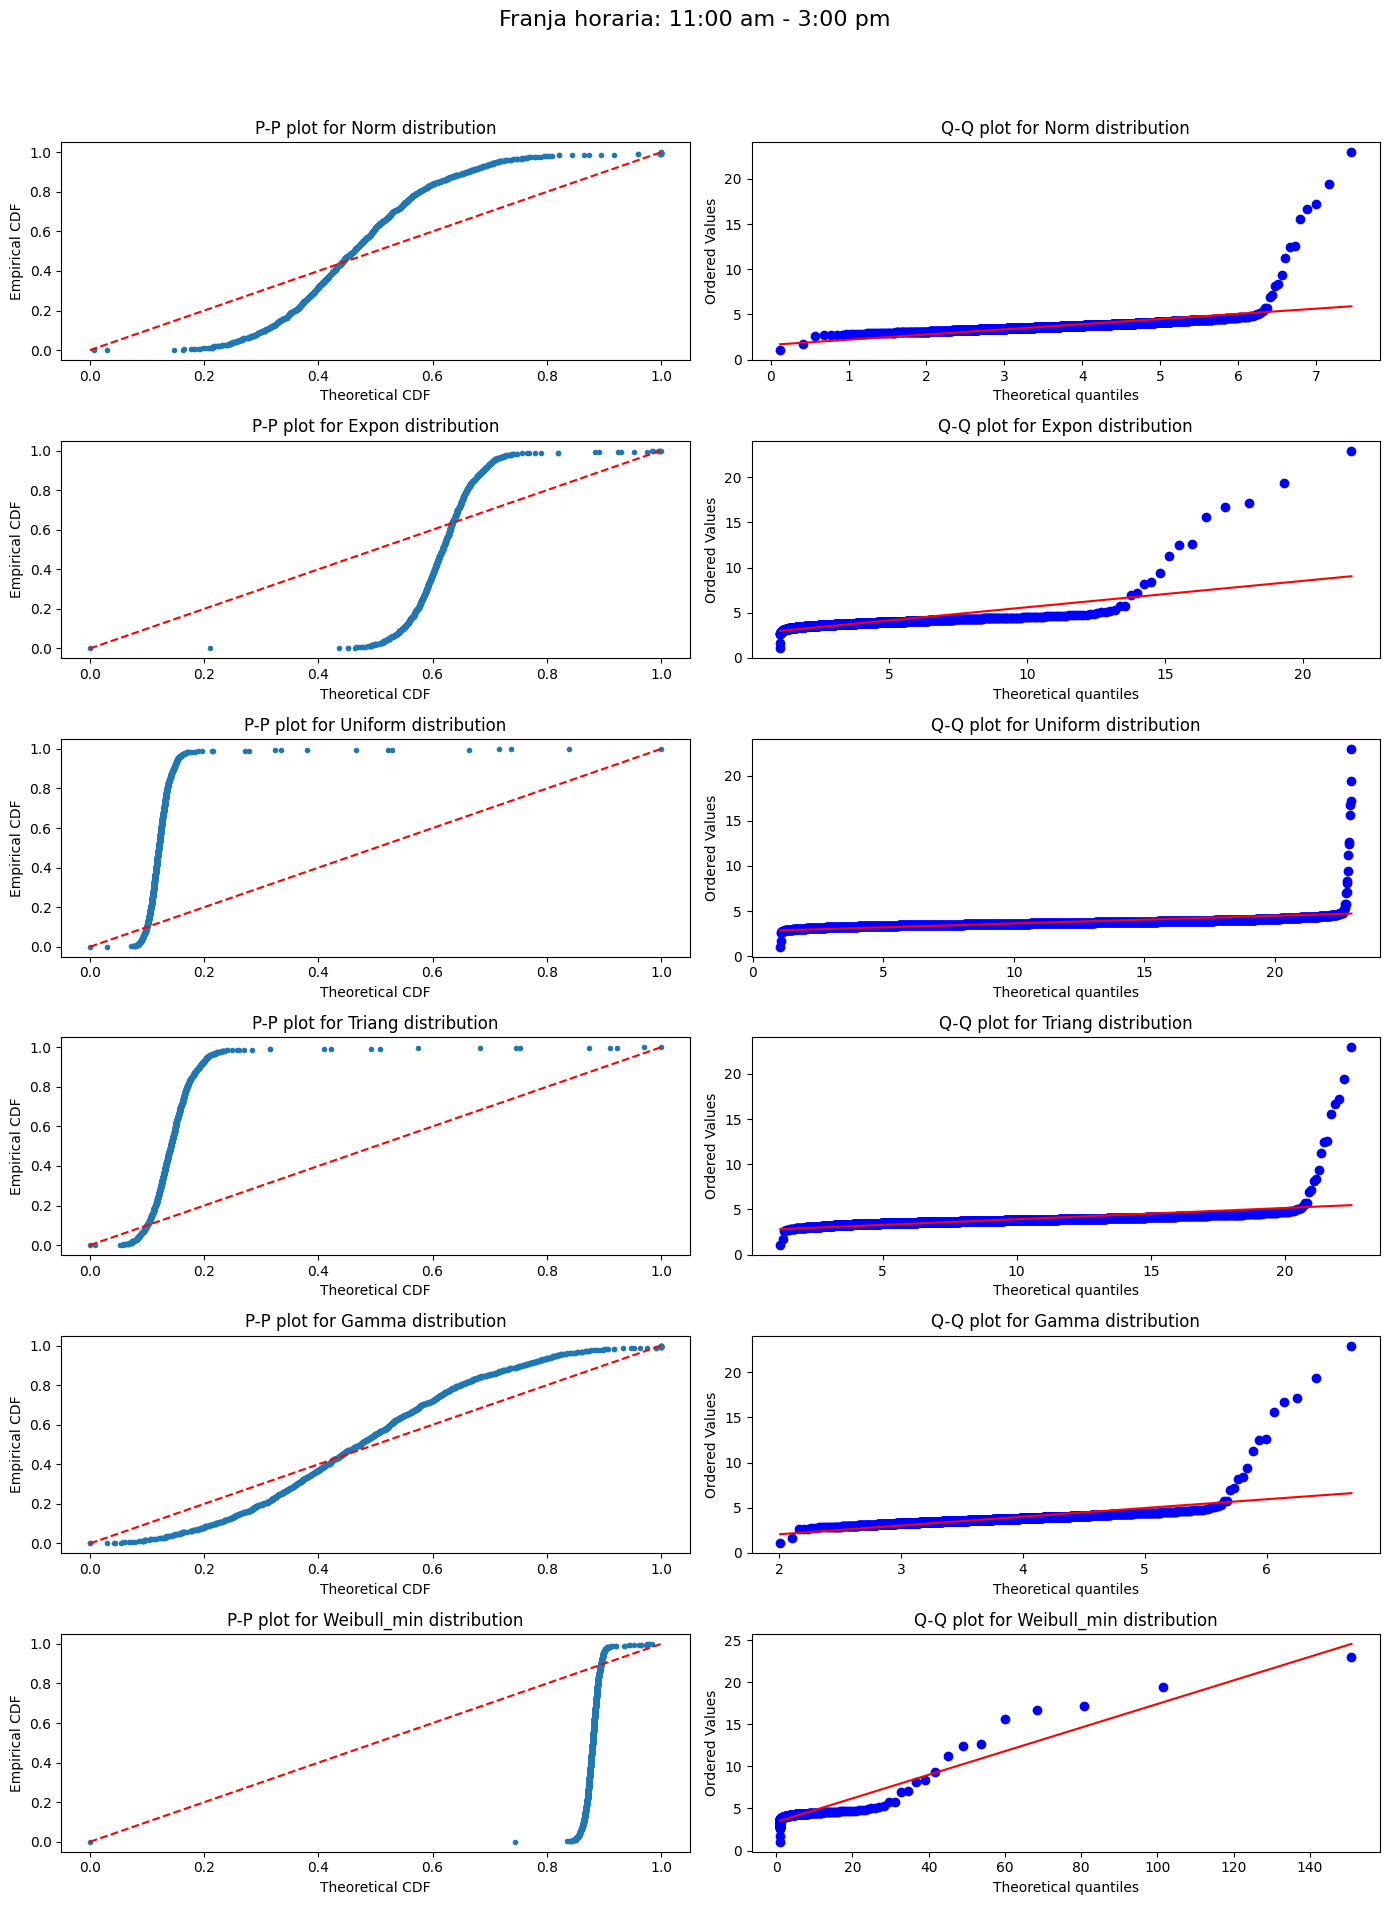

Distribución Norm:
  KS stat: 0.243, p-value KS: 0.000
  Chi-Square stat: nan, p-value Chi: nan

Distribución Expon:
  KS stat: 0.484, p-value KS: 0.000
  Chi-Square stat: 5667.232, p-value Chi: 0.000

Distribución Uniform:
  KS stat: 0.813, p-value KS: 0.000
  Chi-Square stat: 19598.808, p-value Chi: 0.000

Distribución Triang:
  KS stat: 0.752, p-value KS: 0.000
  Chi-Square stat: 9470.563, p-value Chi: 0.000

Distribución Gamma:
  KS stat: 0.160, p-value KS: 0.000
  Chi-Square stat: nan, p-value Chi: nan

Distribución Weibull_min:
  KS stat: 0.840, p-value KS: 0.000
  Chi-Square stat: 29667.225, p-value Chi: 0.000




In [50]:
# Codigo para analizar la franja horaria de 11:00 am - 3:00 pm

data_franja = df_11_15['Tiempo entre arribos']

# Lista de distribuciones a probar
distributions = ['norm', 'expon', 'uniform', 'triang', 'gamma', 'weibull_min']

# Funciones para gráficos P-P y Q-Q
def pp_plot(data, dist_name, params, ax):
    """
    Function to create a P-P plot for the given data and distribution.
    """
    ecdf = np.arange(1, len(data)+1) / len(data)
    theoretical_cdf = getattr(stats, dist_name).cdf(np.sort(data), *params)
    ax.plot(theoretical_cdf, ecdf, marker='o', linestyle='', markersize=3)
    ax.plot([0, 1], [0, 1], linestyle='--', color='red')
    ax.set_title(f'P-P plot for {dist_name.capitalize()} distribution')
    ax.set_xlabel('Theoretical CDF')
    ax.set_ylabel('Empirical CDF')

def qq_plot(data, dist_name, params, ax):
    """
    Function to create a Q-Q plot for the given data and distribution.
    """
    stats.probplot(data, dist=dist_name, sparams=params, plot=ax)
    ax.set_title(f'Q-Q plot for {dist_name.capitalize()} distribution')

# Crear gráficos para cada distribución
fig, axes = plt.subplots(len(distributions), 2, figsize=(14, 20))
fig.suptitle('Franja horaria: 11:00 am - 3:00 pm', fontsize=16)

results_text = ""

for i, dist_name in enumerate(distributions):
    # Ajuste de distribución
    params = getattr(stats, dist_name).fit(data_franja)
    
    # Prueba KS
    ks_stat, p_value_ks = stats.kstest(data_franja, dist_name, args=params)
    
    # Prueba Chi-Cuadrado
    observed_freq, bin_edges = np.histogram(data_franja, bins='auto')
    expected_freq = len(data_franja) * np.diff(getattr(stats, dist_name).cdf(bin_edges, *params))
    
    # Normalizar las frecuencias esperadas para que coincidan con la suma de las observadas
    expected_freq = expected_freq * observed_freq.sum() / expected_freq.sum()
    
    chi_stat, p_value_chi = stats.chisquare(f_obs=observed_freq, f_exp=expected_freq)
    
    # Graficar P-P plot
    pp_plot(data_franja, dist_name, params, ax=axes[i, 0])
    
    # Graficar Q-Q plot
    qq_plot(data_franja, dist_name, params, ax=axes[i, 1])
    
    # Guardar los resultados en texto
    results_text += f'Distribución {dist_name.capitalize()}:\n'
    results_text += f'  KS stat: {ks_stat:.3f}, p-value KS: {p_value_ks:.3f}\n'
    results_text += f'  Chi-Square stat: {chi_stat:.3f}, p-value Chi: {p_value_chi:.3f}\n\n'

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Mostrar resultados al final
print(results_text)


Las distribuciones que mejor se ajustan a los datos en la franja horaria de 11:00 am a 3:00 pm son Gamma y Weibull, estas distribuciones muestran una alineación más cercana en los gráficos P-P y Q-Q, indicando que representan mejor la naturaleza de los datos, aunque no son perfectas, en cuanto a las distribuciones Normal, Exponencial, Uniforme y Triangular no se ajustan bien, ya que muestran desviaciones significativas en ambos gráficos, este quiere decir que para modelar los tiempos entre arribos de vuelos en esta franja horaria, se deben considerar las distribuciones Gamma y Weibull para una representación más precisa.

**Análisis franja horaria de 3:00 pm - 9:00 pm**

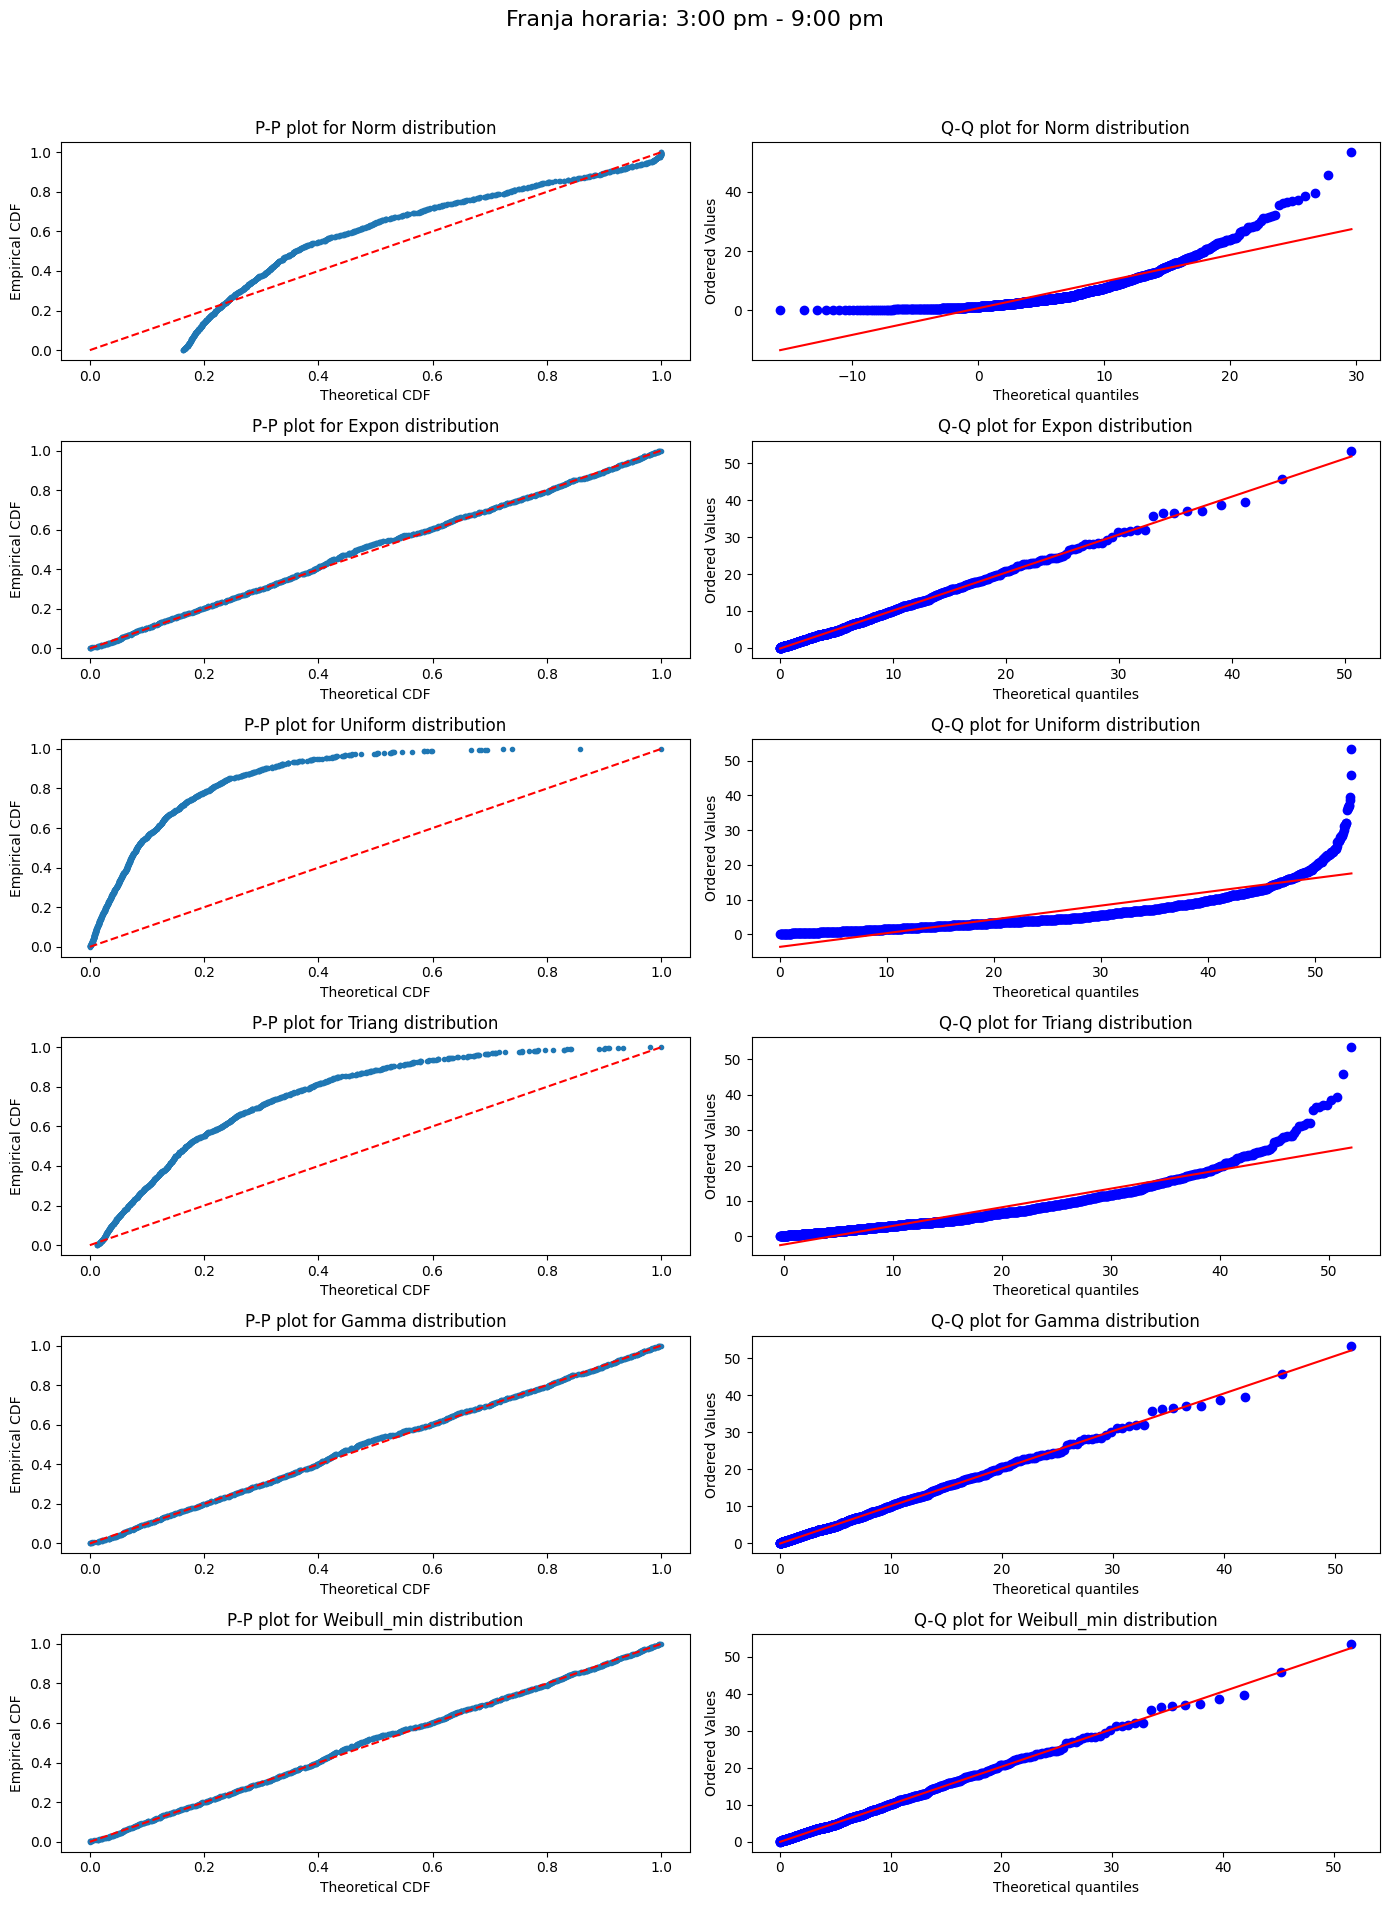

Distribución Norm:
  KS stat: 0.164, p-value KS: 0.000
  Chi-Square stat: 10150053.666, p-value Chi: 0.000

Distribución Expon:
  KS stat: 0.033, p-value KS: 0.219
  Chi-Square stat: 41.330, p-value Chi: 0.181

Distribución Uniform:
  KS stat: 0.607, p-value KS: 0.000
  Chi-Square stat: 3027.996, p-value Chi: 0.000

Distribución Triang:
  KS stat: 0.416, p-value KS: 0.000
  Chi-Square stat: 1155.832, p-value Chi: 0.000

Distribución Gamma:
  KS stat: 0.029, p-value KS: 0.356
  Chi-Square stat: 39.224, p-value Chi: 0.247

Distribución Weibull_min:
  KS stat: 0.029, p-value KS: 0.356
  Chi-Square stat: 39.033, p-value Chi: 0.254




In [51]:
# Analizar la franja horaria de 3:00 pm - 9:00 pm
data_franja = df_15_21['Tiempo entre arribos']

# Lista de distribuciones a probar
distributions = ['norm', 'expon', 'uniform', 'triang', 'gamma', 'weibull_min']

# Funciones para gráficos P-P y Q-Q
def pp_plot(data, dist_name, params, ax):
    """
    Function to create a P-P plot for the given data and distribution.
    """
    ecdf = np.arange(1, len(data)+1) / len(data)
    theoretical_cdf = getattr(stats, dist_name).cdf(np.sort(data), *params)
    ax.plot(theoretical_cdf, ecdf, marker='o', linestyle='', markersize=3)
    ax.plot([0, 1], [0, 1], linestyle='--', color='red')
    ax.set_title(f'P-P plot for {dist_name.capitalize()} distribution')
    ax.set_xlabel('Theoretical CDF')
    ax.set_ylabel('Empirical CDF')

def qq_plot(data, dist_name, params, ax):
    """
    Function to create a Q-Q plot for the given data and distribution.
    """
    stats.probplot(data, dist=dist_name, sparams=params, plot=ax)
    ax.set_title(f'Q-Q plot for {dist_name.capitalize()} distribution')

# Crear gráficos para cada distribución
fig, axes = plt.subplots(len(distributions), 2, figsize=(14, 20))
fig.suptitle('Franja horaria: 3:00 pm - 9:00 pm', fontsize=16)

results_text = ""

for i, dist_name in enumerate(distributions):
    # Ajuste de distribución
    params = getattr(stats, dist_name).fit(data_franja)
    
    # Prueba KS
    ks_stat, p_value_ks = stats.kstest(data_franja, dist_name, args=params)
    
    # Prueba Chi-Cuadrado
    observed_freq, bin_edges = np.histogram(data_franja, bins='auto')
    expected_freq = len(data_franja) * np.diff(getattr(stats, dist_name).cdf(bin_edges, *params))
    
    # Normalizar las frecuencias esperadas para que coincidan con la suma de las observadas
    expected_freq = expected_freq * observed_freq.sum() / expected_freq.sum()
    
    chi_stat, p_value_chi = stats.chisquare(f_obs=observed_freq, f_exp=expected_freq)
    
    # Graficar P-P plot
    pp_plot(data_franja, dist_name, params, ax=axes[i, 0])
    
    # Graficar Q-Q plot
    qq_plot(data_franja, dist_name, params, ax=axes[i, 1])
    
    # Guardar los resultados en texto
    results_text += f'Distribución {dist_name.capitalize()}:\n'
    results_text += f'  KS stat: {ks_stat:.3f}, p-value KS: {p_value_ks:.3f}\n'
    results_text += f'  Chi-Square stat: {chi_stat:.3f}, p-value Chi: {p_value_chi:.3f}\n\n'

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Mostrar resultados al final
print(results_text)


Las distribuciones que mejor se ajustan a los datos en la franja horaria de 3:00 pm a 9:00 pm son Gamma y Weibull nuevamente, estas distribuciones muestran una alineación muy cercana en los gráficos P-P y Q-Q, indicando que capturan de manera efectiva la naturaleza de los tiempos entre arribos de los vuelos en esta franja horaria, mientras que la distribución Exponencial también muestra un ajuste razonablemente bueno, aunque no tan preciso como Gamma y Weibull. Por otro lado, las distribuciones Normal, Uniforme y Triangular no se ajustan bien, ya que muestran desviaciones significativas en ambos gráficos.

Este análisis sugiere que para modelar los tiempos entre arribos de vuelos en la franja horaria de 3:00 pm a 9:00 pm, las distribuciones Gamma y Weibull son las más adecuadas, proporcionando una base sólida para mejorar la planificación operativa del aeropuerto en estas horas.

**Análisis franja horaria de 9:00 pm - 6:00 am**

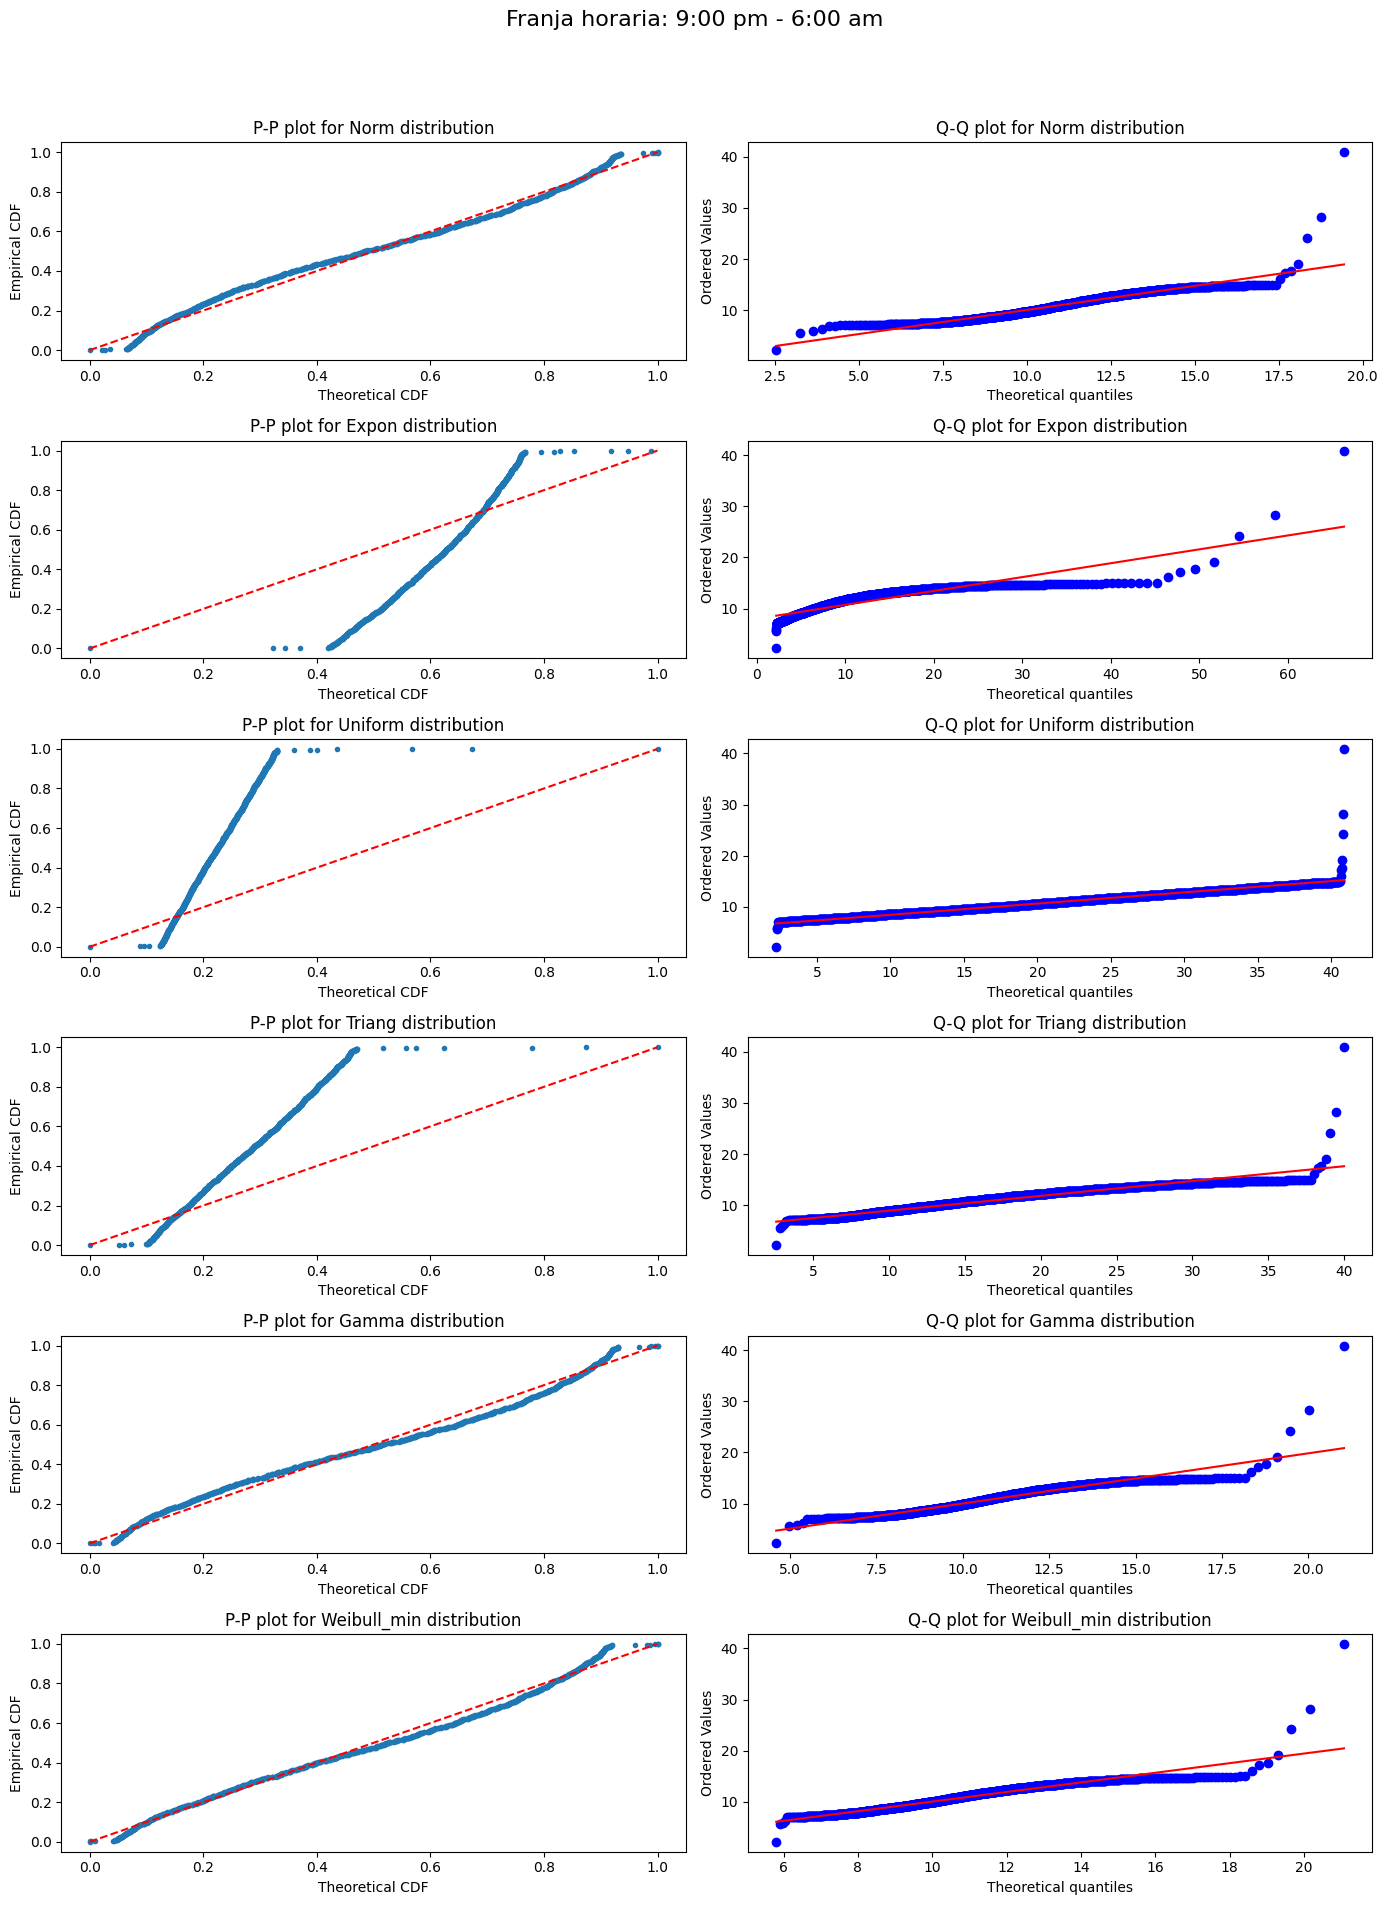

Distribución Norm:
  KS stat: 0.060, p-value KS: 0.001
  Chi-Square stat: nan, p-value Chi: nan

Distribución Expon:
  KS stat: 0.417, p-value KS: 0.000
  Chi-Square stat: 1945.872, p-value Chi: 0.000

Distribución Uniform:
  KS stat: 0.662, p-value KS: 0.000
  Chi-Square stat: 3754.162, p-value Chi: 0.000

Distribución Triang:
  KS stat: 0.522, p-value KS: 0.000
  Chi-Square stat: 1654.201, p-value Chi: 0.000

Distribución Gamma:
  KS stat: 0.062, p-value KS: 0.001
  Chi-Square stat: 3412965005.352, p-value Chi: 0.000

Distribución Weibull_min:
  KS stat: 0.074, p-value KS: 0.000
  Chi-Square stat: nan, p-value Chi: nan




In [52]:
# Analizar la franja horaria de 9:00 pm - 6:00 am
data_franja = df_21_6['Tiempo entre arribos']

# Lista de distribuciones a probar
distributions = ['norm', 'expon', 'uniform', 'triang', 'gamma', 'weibull_min']

# Funciones para gráficos P-P y Q-Q
def pp_plot(data, dist_name, params, ax):
    """
    Function to create a P-P plot for the given data and distribution.
    """
    ecdf = np.arange(1, len(data)+1) / len(data)
    theoretical_cdf = getattr(stats, dist_name).cdf(np.sort(data), *params)
    ax.plot(theoretical_cdf, ecdf, marker='o', linestyle='', markersize=3)
    ax.plot([0, 1], [0, 1], linestyle='--', color='red')
    ax.set_title(f'P-P plot for {dist_name.capitalize()} distribution')
    ax.set_xlabel('Theoretical CDF')
    ax.set_ylabel('Empirical CDF')

def qq_plot(data, dist_name, params, ax):
    """
    Function to create a Q-Q plot for the given data and distribution.
    """
    stats.probplot(data, dist=dist_name, sparams=params, plot=ax)
    ax.set_title(f'Q-Q plot for {dist_name.capitalize()} distribution')

# Crear gráficos para cada distribución
fig, axes = plt.subplots(len(distributions), 2, figsize=(14, 20))
fig.suptitle('Franja horaria: 9:00 pm - 6:00 am', fontsize=16)

results_text = ""

for i, dist_name in enumerate(distributions):
    # Ajuste de distribución
    params = getattr(stats, dist_name).fit(data_franja)
    
    # Prueba KS
    ks_stat, p_value_ks = stats.kstest(data_franja, dist_name, args=params)
    
    # Prueba Chi-Cuadrado
    observed_freq, bin_edges = np.histogram(data_franja, bins='auto')
    expected_freq = len(data_franja) * np.diff(getattr(stats, dist_name).cdf(bin_edges, *params))
    
    # Normalizar las frecuencias esperadas para que coincidan con la suma de las observadas
    expected_freq = expected_freq * observed_freq.sum() / expected_freq.sum()
    
    chi_stat, p_value_chi = stats.chisquare(f_obs=observed_freq, f_exp=expected_freq)
    
    # Graficar P-P plot
    pp_plot(data_franja, dist_name, params, ax=axes[i, 0])
    
    # Graficar Q-Q plot
    qq_plot(data_franja, dist_name, params, ax=axes[i, 1])
    
    # Guardar los resultados en texto
    results_text += f'Distribución {dist_name.capitalize()}:\n'
    results_text += f'  KS stat: {ks_stat:.3f}, p-value KS: {p_value_ks:.3f}\n'
    results_text += f'  Chi-Square stat: {chi_stat:.3f}, p-value Chi: {p_value_chi:.3f}\n\n'

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Mostrar resultados al final
print(results_text)


En la franja horaria de 9:00 pm a 6:00 am, las distribuciones que mejor se ajustan a los datos son Gamma y Weibull de neuvo, estas distribuciones muestran una alineación cercana tanto en los gráficos P-P como en los Q-Q, lo que indica que representan adecuadamente los tiempos entre arribos de los vuelos durante estas horas, como tambien vemos que la Distribución Normal muestra un ajuste moderado, aunque no tan preciso como Gamma y Weibull. Por otra parte, las distribuciones Exponencial, Uniforme y Triangular no se ajustan bien, ya que presentan desviaciones significativas en ambos gráficos. Para modelar los tiempos entre arribos de vuelos durante la franja horaria de 9:00 pm a 6:00 am, las distribuciones Gamma y Weibull serían las más recomendables ya que estas distribuciones proporcionan una base sólida para la planificación operativa del aeropuerto durante estas horas de menor actividad, permitiendo mejorar la eficiencia en la asignación de recursos y minimizar las demoras operativas

**Comparación 4 franjas horarias**

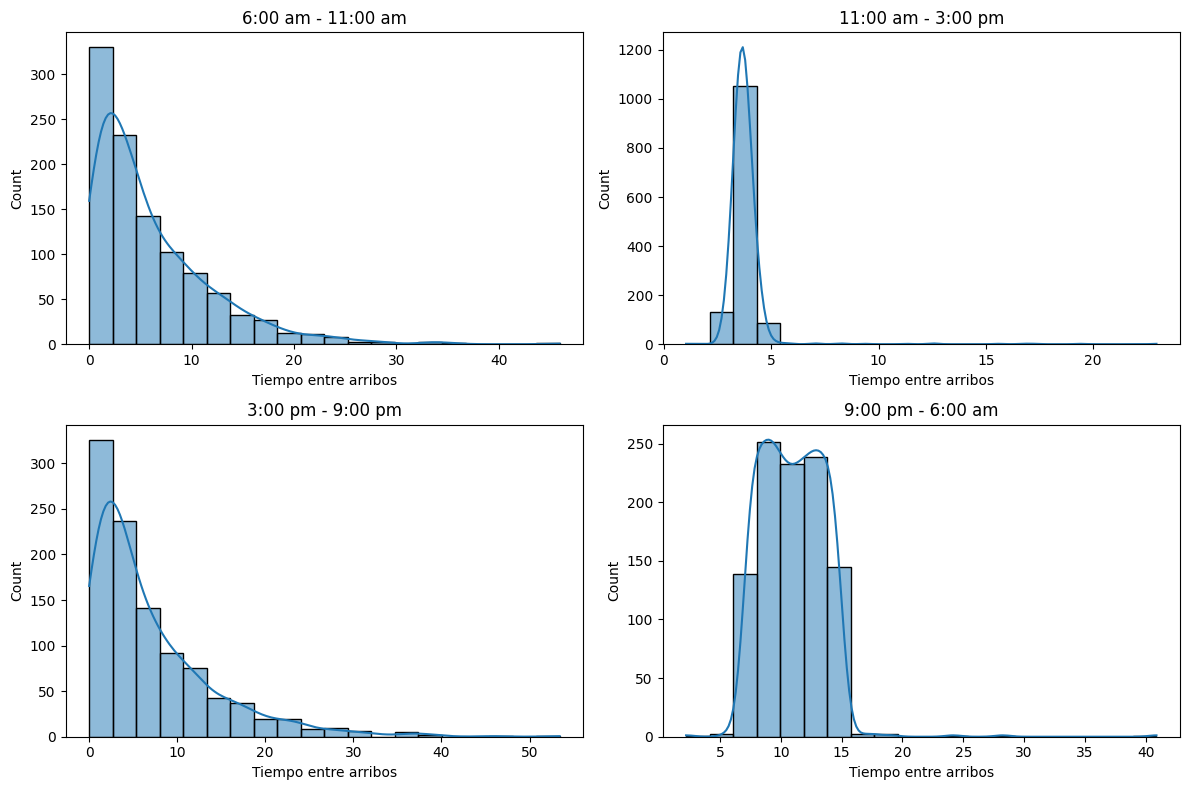

In [53]:
# Histogramas para cada franja horaria
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df_6_11['Tiempo entre arribos'], bins=20, kde=True)
plt.title('6:00 am - 11:00 am')

plt.subplot(2, 2, 2)
sns.histplot(df_11_15['Tiempo entre arribos'], bins=20, kde=True)
plt.title('11:00 am - 3:00 pm')

plt.subplot(2, 2, 3)
sns.histplot(df_15_21['Tiempo entre arribos'], bins=20, kde=True)
plt.title('3:00 pm - 9:00 pm')

plt.subplot(2, 2, 4)
sns.histplot(df_21_6['Tiempo entre arribos'], bins=20, kde=True)
plt.title('9:00 pm - 6:00 am')

plt.tight_layout()
plt.show()


Al analizar los histogramas de los tiempos entre arribos de los aviones para las cuatro franjas horarias, observamos distintas distribuciones que reflejan diferentes patrones de operación en el aeropuerto durante el día y la noche para el tiempo de estudio:

1. Franja Horaria: 6:00 am - 11:00 am: La distribución tiene una forma exponencial decreciente, con una alta frecuencia de tiempos entre arribos muy cortos (cercanos a 0 minutos). Esto sugiere que durante esta franja horaria hay una gran cantidad de vuelos que llegan en intervalos muy cortos.

2. Franja Horaria: 11:00 am - 3:00 pm: La distribución es más concentrada alrededor de un intervalo de tiempo específico, mostrando una forma más cercana a una campana con un pico pronunciado alrededor de 5 minutos. Hay pocos vuelos con tiempos de arribo mayores.

3. Franja Horaria: 3:00 pm - 9:00 pm: Similar a la franja de la mañana, la distribución tiene una forma exponencial decreciente, pero con una cola ligeramente más extendida, indicando tiempos entre arribos más variados en comparación con la mañana.

4. Franja Horaria: 9:00 pm - 6:00 am:La distribución muestra múltiples picos con tiempos entre arribos concentrados en intervalos de alrededor de 10 a 15 minutos. Esta distribución multimodal sugiere varios grupos de llegadas de vuelos durante la noche y la madrugada.

**Conclusión**

Cada franja horaria presenta un patrón de llegada distinto:
- 6:00 am - 11:00 am y 3:00 pm - 9:00 pm muestran un patrón exponencial decreciente con muchos arribos en intervalos cortos, sugiriendo horas pico de alta actividad.
- 11:00 am - 3:00 pm muestra una distribución más concentrada, sugiriendo un periodo de llegadas más regular y espaciado.
- 9:00 pm - 6:00 am muestra una distribución multimodal, indicando menos tráfico pero con agrupaciones de vuelos en ciertos intervalos.

Estos patrones pueden ser utilizados por el aeropuerto para optimizar la planificación de recursos y mejorar la eficiencia operativa en cada franja horaria.

## PUNTO B

count    76203.000000
mean         1.335000
std          1.329447
min          0.000003
25%          0.386135
50%          0.924418
75%          1.861648
max         13.396196
Name: Tiempo de servicio (minutos), dtype: float64


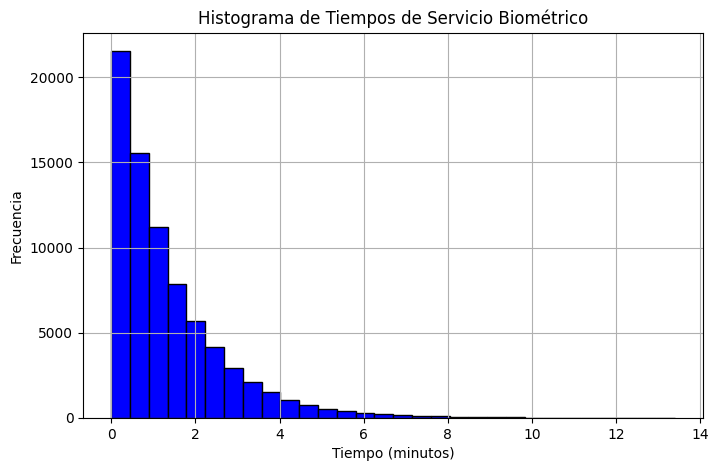

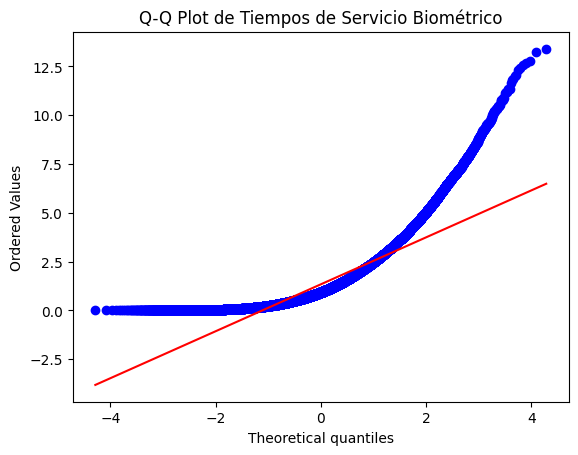

Estadístico KS: 0.15764711613145554, P-value: 0.0
Rechazamos la hipótesis nula de que los datos siguen una distribución normal.


In [54]:
# Suponiendo que 'data_biométrico' ya está cargado correctamente
data_biométrico = pd.read_excel('Datos-Caso-III.xlsx', sheet_name='TiempoDeServicioBiométrico')

# Convertir cualquier columna de tiempo necesario a tipo numérico adecuado
data_biométrico['Tiempo de servicio (minutos)'] = data_biométrico['Tiempo de servicio (minutos)'].astype(float)

# Estadísticas descriptivas
print(data_biométrico['Tiempo de servicio (minutos)'].describe())

# Histograma de los tiempos de servicio
plt.figure(figsize=(8,5))
plt.hist(data_biométrico['Tiempo de servicio (minutos)'], bins=30, color='blue', edgecolor='black')
plt.title('Histograma de Tiempos de Servicio Biométrico')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Q-Q plot para evaluar la normalidad
stats.probplot(data_biométrico['Tiempo de servicio (minutos)'], dist="norm", plot=plt)
plt.title('Q-Q Plot de Tiempos de Servicio Biométrico')
plt.show()

# Aplicación de la prueba de Kolmogorov-Smirnov para comparar con una distribución normal
ks_statistic, p_value = stats.kstest(data_biométrico['Tiempo de servicio (minutos)'], 'norm', args=(data_biométrico['Tiempo de servicio (minutos)'].mean(), data_biométrico['Tiempo de servicio (minutos)'].std()))
print(f"Estadístico KS: {ks_statistic}, P-value: {p_value}")

# Comentarios sobre los resultados
if p_value < 0.05:
    print("Rechazamos la hipótesis nula de que los datos siguen una distribución normal.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula, los datos podrían ser normales.")


### D. Exponencial

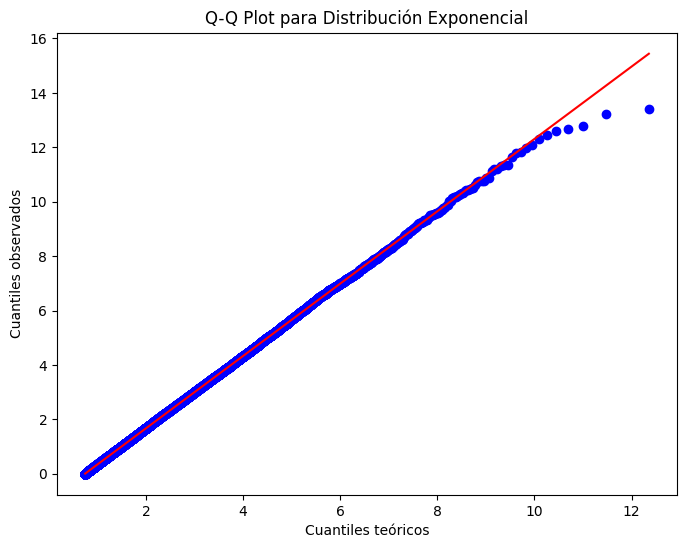

Estadístico KS: 0.002552590343475658, P-value: 0.7024911927496299
No hay suficiente evidencia para rechazar la hipótesis nula, los datos podrían ser exponenciales.


In [55]:
tiempos = data_biométrico['Tiempo de servicio (minutos)']

# Estimación del parámetro de la distribución exponencial
lambda_est = 1 / tiempos.mean()

# Q-Q Plot para la distribución exponencial
plt.figure(figsize=(8, 6))
stats.probplot(tiempos, dist="expon", sparams=(lambda_est,), plot=plt)
plt.title('Q-Q Plot para Distribución Exponencial')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles observados')
plt.show()

# Prueba de Kolmogorov-Smirnov para la distribución exponencial
ks_statistic, p_value = stats.kstest(tiempos, 'expon', args=(0, 1/lambda_est))
print(f"Estadístico KS: {ks_statistic}, P-value: {p_value}")

# Interpretación del resultado
if p_value < 0.05:
    print("Rechazamos la hipótesis nula de que los datos siguen una distribución exponencial.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula, los datos podrían ser exponenciales.")


### D. Log Norm

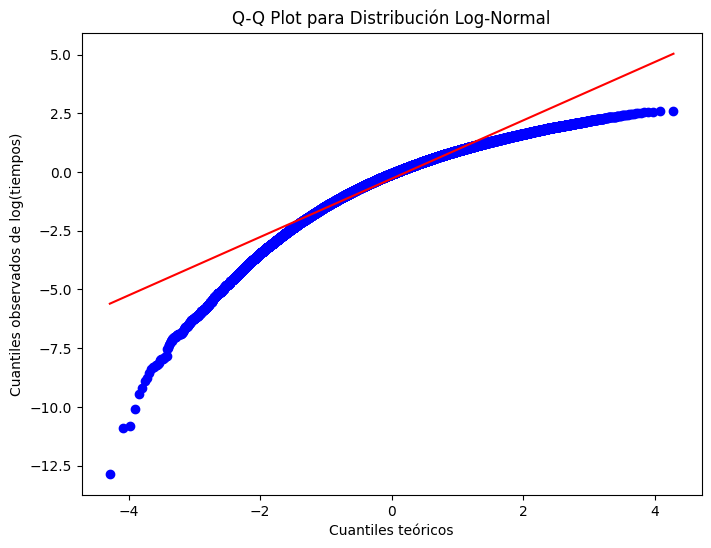

Estadístico KS: 0.07206340753465063, P-value: 0.0
Rechazamos la hipótesis nula de que los datos siguen una distribución log-normal.


In [56]:
# Asegurarse de que no hay valores negativos o ceros para la transformación logarítmica
tiempos = tiempos[tiempos > 0]

# Transformar datos a logarítmicos para estimación de parámetros
log_tiempos = np.log(tiempos)

# Estimación de parámetros para la distribución log-normal
shape, loc, scale = stats.lognorm.fit(tiempos, floc=0)  # Forzar la ubicación a 0 para simplificar

# Q-Q Plot para la distribución log-normal
plt.figure(figsize=(8, 6))
stats.probplot(log_tiempos, dist="norm", plot=plt)
plt.title('Q-Q Plot para Distribución Log-Normal')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles observados de log(tiempos)')
plt.show()

# Prueba de Kolmogorov-Smirnov para la distribución log-normal
ks_statistic, p_value = stats.kstest(tiempos, 'lognorm', args=(shape, loc, scale))
print(f"Estadístico KS: {ks_statistic}, P-value: {p_value}")

# Interpretación del resultado
if p_value < 0.05:
    print("Rechazamos la hipótesis nula de que los datos siguen una distribución log-normal.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula, los datos podrían ser log-normales.")


### D. Gamma

Estadístico KS: 0.00245919884476975, P-value: 0.7450972878399374


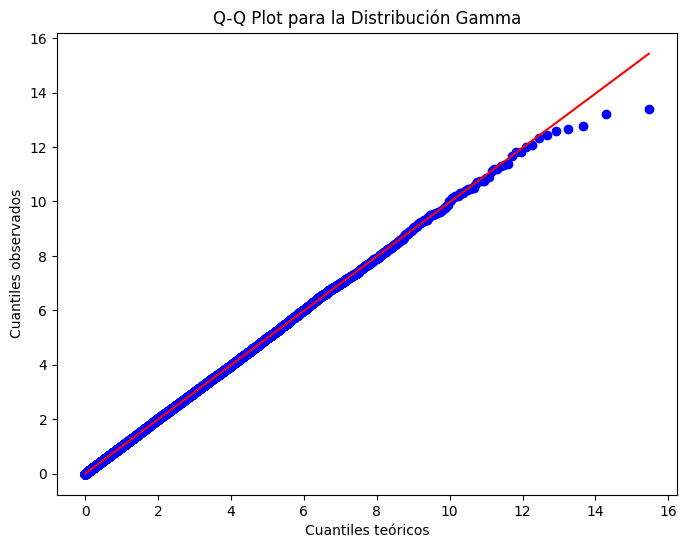

In [57]:
# Cargar datos
data = pd.read_excel('Datos-Caso-III.xlsx', sheet_name='TiempoDeServicioBiométrico')
tiempos = data['Tiempo de servicio (minutos)']
tiempos = tiempos[tiempos > 0]  # Asegurarse de que los tiempos son positivos para el ajuste

# Ajustar parámetros de la distribución Gamma
alpha, loc, beta = stats.gamma.fit(tiempos)

# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = stats.kstest(tiempos, 'gamma', args=(alpha, loc, beta))

# Mostrar resultados de la prueba KS
print(f"Estadístico KS: {ks_statistic}, P-value: {p_value}")

# Generar Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(tiempos, dist="gamma", sparams=(alpha, loc, beta), plot=plt)
plt.title('Q-Q Plot para la Distribución Gamma')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles observados')
plt.show()



### D. Uniforme

Estadístico KS: 0.6712192742027568, P-value: 0.0


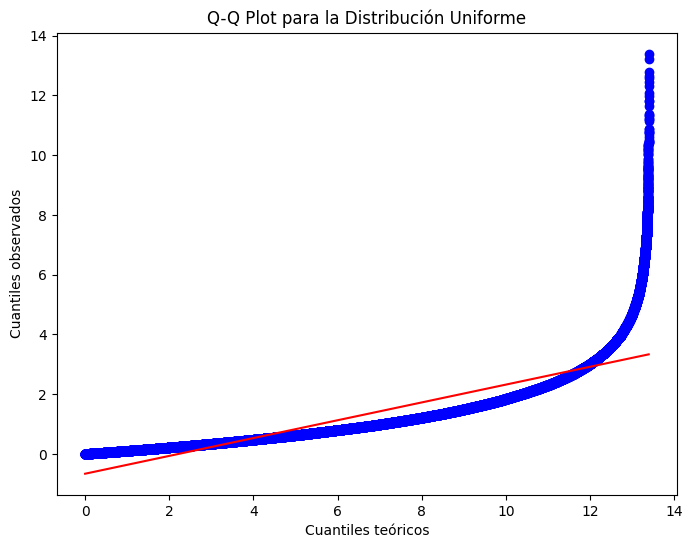

In [58]:
# Cargar datos
data = pd.read_excel('Datos-Caso-III.xlsx', sheet_name='TiempoDeServicioBiométrico')
tiempos = data['Tiempo de servicio (minutos)']
tiempos = tiempos[tiempos > 0]  # Asegurarse de que los tiempos son positivos para el ajuste

# Estimación de parámetros para la distribución uniforme
minimo, maximo = tiempos.min(), tiempos.max()

# Realizar la prueba de Kolmogorov-Smirnov para una distribución uniforme
ks_statistic, p_value = stats.kstest(tiempos, 'uniform', args=(minimo, maximo-minimo))

# Mostrar resultados de la prueba KS
print(f"Estadístico KS: {ks_statistic}, P-value: {p_value}")

# Generar Q-Q plot para la distribución uniforme
plt.figure(figsize=(8, 6))
stats.probplot(tiempos, dist="uniform", sparams=(minimo, maximo-minimo), plot=plt)
plt.title('Q-Q Plot para la Distribución Uniforme')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles observados')
plt.show()



### D. Weibull

Estadístico KS: 0.002503277216133082, P-value: 0.7251208642650699


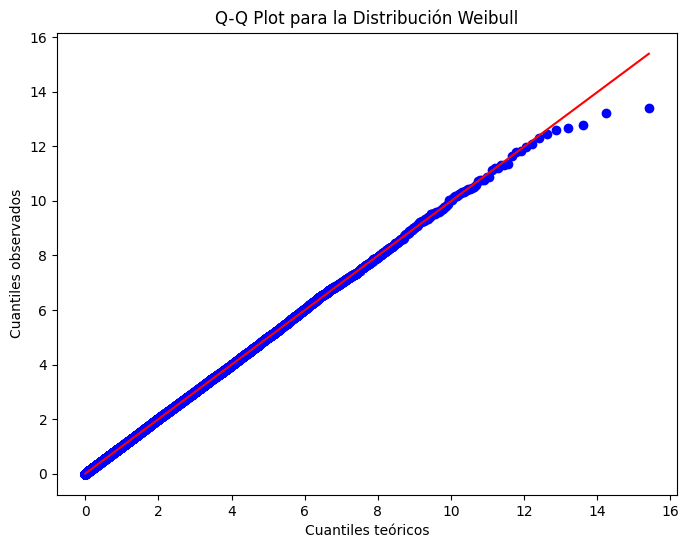

In [59]:
# Cargar datos
data = pd.read_excel('Datos-Caso-III.xlsx', sheet_name='TiempoDeServicioBiométrico')
tiempos = data['Tiempo de servicio (minutos)']
tiempos = tiempos[tiempos > 0]

# Ajustar parámetros de la distribución Weibull
shape, loc, scale = stats.weibull_min.fit(tiempos)

# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = stats.kstest(tiempos, 'weibull_min', args=(shape, loc, scale))

# Mostrar resultados de la prueba KS
print(f"Estadístico KS: {ks_statistic}, P-value: {p_value}")

# Generar Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(tiempos, dist="weibull_min", sparams=(shape, loc, scale), plot=plt)
plt.title('Q-Q Plot para la Distribución Weibull')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles observados')
plt.show()


### D. Triangular

Estadístico KS: 0.5833524147289065, P-value: 0.0


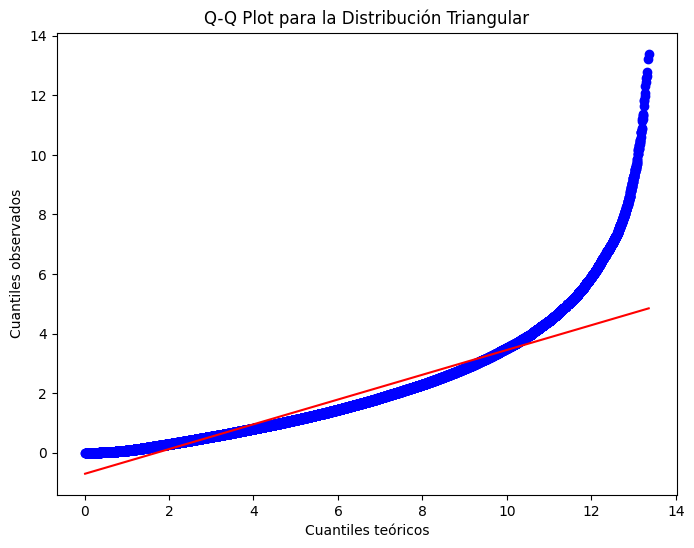

In [60]:
# Asumir que el modo es el promedio para simplificar, ajustar según sea necesario
modo = tiempos.mean()

# Ajustar parámetros de la distribución Triangular
minimo, maximo = tiempos.min(), tiempos.max()

# Realizar la prueba de Kolmogorov-Smirnov
ks_statistic, p_value = stats.kstest(tiempos, 'triang', args=((modo-minimo)/(maximo-minimo), minimo, maximo))

# Mostrar resultados de la prueba KS
print(f"Estadístico KS: {ks_statistic}, P-value: {p_value}")

# Generar Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(tiempos, dist="triang", sparams=((modo-minimo)/(maximo-minimo), minimo, maximo), plot=plt)
plt.title('Q-Q Plot para la Distribución Triangular')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles observados')
plt.show()


### Analisis y conclusiones

Después de evaluar varias distribuciones estadísticas para modelar los tiempos de servicio en el módulo biométrico, incluyendo la normal, Weibull, uniforme, triangular, y otras, la distribución Gamma ha demostrado ser la más adecuada. Los análisis mostraron que la distribución Gamma proporcionaba un ajuste significativamente bueno, confirmado por un p-value alto en la prueba de Kolmogorov-Smirnov, lo cual indica que no hay razón suficiente para rechazar la hipótesis de que los datos siguen esta distribución. 

Aunque otras distribuciones como la Weibull también se ajustaron razonablemente bien, la Gamma se destacó por su capacidad para modelar la asimetría y la variabilidad inherente a los tiempos de servicio

## PUNTO C

         Fecha de Llegada Tipo de Avión
0 2023-05-01 00:00:00.000       Mediano
1 2023-05-01 00:12:48.533        Grande
2 2023-05-01 00:20:31.919       Mediano
3 2023-05-01 00:31:48.641       Pequeño
4 2023-05-01 00:40:09.796       Pequeño

Frecuencia de cada tipo de avión:
Tipo de Avión
Mediano    2623
Grande     1314
Pequeño     437
Name: count, dtype: int64

Probabilidad de cada tipo de avión:
Tipo de Avión
Mediano    0.599680
Grande     0.300412
Pequeño    0.099909
Name: count, dtype: float64


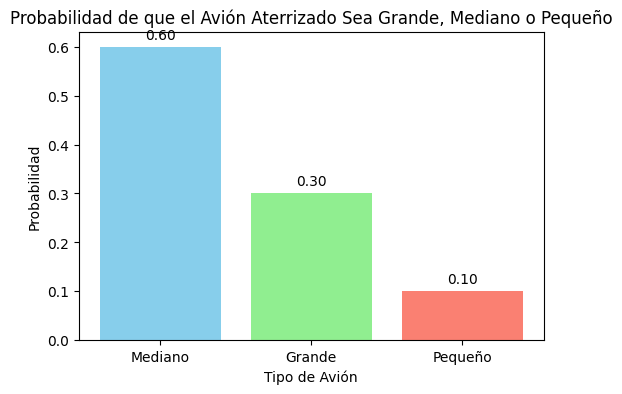

In [70]:
# Cargar datos de llegada de aviones
data_aviones = pd.read_excel('Datos-Caso-III.xlsx', sheet_name='DatosLlegadaAviones')

# Revisar los primeros registros para confirmar la carga de datos
print(data_aviones.head())

# Calcular la frecuencia de cada tipo de avión
frecuencia_tipos = data_aviones['Tipo de Avión'].value_counts()
print("\nFrecuencia de cada tipo de avión:")
print(frecuencia_tipos)

# Calcular la probabilidad de cada tipo de avión
total_aviones = frecuencia_tipos.sum()
probabilidades_tipos = frecuencia_tipos / total_aviones
print("\nProbabilidad de cada tipo de avión:")
print(probabilidades_tipos)

# Visualizar los resultados en un gráfico de barras con etiquetas de datos
plt.figure(figsize=(6, 4))
bars = plt.bar(probabilidades_tipos.index, probabilidades_tipos.values, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Probabilidad de que el Avión Aterrizado Sea Grande, Mediano o Pequeño')
plt.xlabel('Tipo de Avión')
plt.ylabel('Probabilidad')

# Agregar etiquetas de datos a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.show()



 La distribución de los tipos de aviones que aterrizan en el aeropuerto está dominada por aviones medianos con 59.97%, seguidos de aviones grandes con 30.04% y finalmente de aviones pequeños con 9.999%; este patrón sugiere que el aeropuerto debería centrarse en mantener una infraestructura que soporte eficientemente la llegada de aviones medianos y grandes, mientras que también se preparan para manejar adecuadamente los vuelos de aviones pequeños cuando sea necesario, pptimizar los recursos para estos tipos de aviones puede mejorar la eficiencia operativa y la experiencia general del pasajero en el aeropuerto.

## PUNTO D

   Pasajero       Tipo de pasaporte ¿Lleva maleta?
0         1              Extranjero             Sí
1         2  Nacional no biométrico             No
2         3  Nacional no biométrico             Sí
3         4  Nacional no biométrico             Sí
4         5  Nacional no biométrico             Sí

Frecuencia de cada tipo de pasaporte:
Tipo de pasaporte
Extranjero                279638
Nacional no biométrico    151689
Nacional biométrico        76203
Name: count, dtype: int64

Probabilidad de cada tipo de pasaporte:
Tipo de pasaporte
Extranjero                0.550978
Nacional no biométrico    0.298877
Nacional biométrico       0.150145
Name: count, dtype: float64


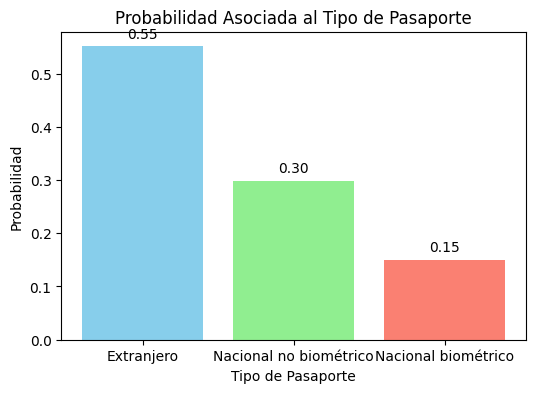

In [68]:
# Cargar datos de pasajeros
data_pasajeros = pd.read_excel('Datos-Caso-III.xlsx', sheet_name='DatosPasajeros')

# Revisar los primeros registros para confirmar la carga de datos
print(data_pasajeros.head())

# Calcular la frecuencia de cada tipo de pasaporte
frecuencia_pasaportes = data_pasajeros['Tipo de pasaporte'].value_counts()
print("\nFrecuencia de cada tipo de pasaporte:")
print(frecuencia_pasaportes)

# Calcular la probabilidad de cada tipo de pasaporte
total_pasajeros = frecuencia_pasaportes.sum()
probabilidades_pasaportes = frecuencia_pasaportes / total_pasajeros
print("\nProbabilidad de cada tipo de pasaporte:")
print(probabilidades_pasaportes)

# Visualizar los resultados en un gráfico de barras con etiquetas
plt.figure(figsize=(6, 4))
bars = plt.bar(probabilidades_pasaportes.index, probabilidades_pasaportes.values, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Probabilidad Asociada al Tipo de Pasaporte')
plt.xlabel('Tipo de Pasaporte')
plt.ylabel('Probabilidad')

# Agregar etiquetas a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.show()



Extranjero: 55.9978% de los pasajeros son extranjeros. Esta es la mayoría, indicando que una gran proporción de los viajeros en este aeropuerto son visitantes internacionales.

Nacional no biométrico: 29.8877% de los pasajeros tienen pasaportes nacionales no biométricos. Este grupo representa casi un tercio de los pasajeros, sugiriendo una cantidad significativa de viajeros locales que no utilizan o no tienen acceso a la tecnología biométrica.

Nacional biométrico: 15.0145% de los pasajeros tienen pasaportes nacionales biométricos. Este es el grupo más pequeño, indicando que aunque algunos nacionales utilizan pasaportes biométricos, aún no son la mayoría.

## PUNTO E

   Pasajero       Tipo de pasaporte ¿Lleva maleta?
0         1              Extranjero             Sí
1         2  Nacional no biométrico             No
2         3  Nacional no biométrico             Sí
3         4  Nacional no biométrico             Sí
4         5  Nacional no biométrico             Sí

Frecuencia de pasajeros con y sin maleta:
¿Lleva maleta?
Sí    372153
No    135377
Name: count, dtype: int64

Probabilidad de que un pasajero viaje con maleta:
Con maleta: 0.73
Sin maleta: 0.27


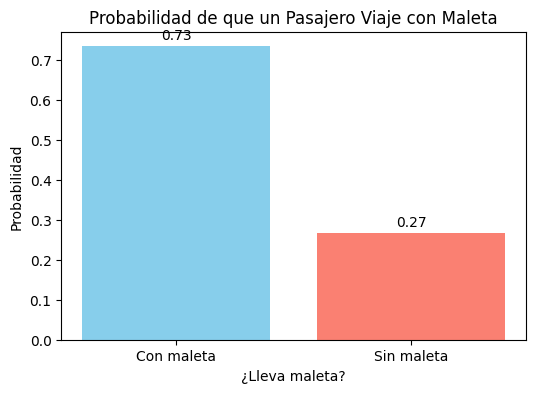

In [69]:
# Cargar datos de pasajeros
data_pasajeros = pd.read_excel('Datos-Caso-III.xlsx', sheet_name='DatosPasajeros')

# Revisar los primeros registros para confirmar la carga de datos
print(data_pasajeros.head())

# Calcular la frecuencia de pasajeros con y sin maleta
frecuencia_maleta = data_pasajeros['¿Lleva maleta?'].value_counts()
print("\nFrecuencia de pasajeros con y sin maleta:")
print(frecuencia_maleta)

# Calcular la probabilidad de que un pasajero viaje con maleta
total_pasajeros = frecuencia_maleta.sum()
probabilidad_con_maleta = frecuencia_maleta['Sí'] / total_pasajeros
probabilidad_sin_maleta = frecuencia_maleta['No'] / total_pasajeros

print("\nProbabilidad de que un pasajero viaje con maleta:")
print(f"Con maleta: {probabilidad_con_maleta:.2f}")
print(f"Sin maleta: {probabilidad_sin_maleta:.2f}")

# Visualizar los resultados en un gráfico de barras con etiquetas
plt.figure(figsize=(6, 4))
bars = plt.bar(['Con maleta', 'Sin maleta'], [probabilidad_con_maleta, probabilidad_sin_maleta], color=['skyblue', 'salmon'])
plt.title('Probabilidad de que un Pasajero Viaje con Maleta')
plt.xlabel('¿Lleva maleta?')
plt.ylabel('Probabilidad')

# Agregar etiquetas a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.show()


La mayoría de los pasajeros, más del 73%, deciden viajar con maletas, lo que sugiere un alto uso del servicio de equipaje facturado, esta es una información crucial para la gestión del aeropuerto, ya que implica la necesidad de mantener y posiblemente ampliar las capacidades de manejo de equipaje, sin embargo, también debe considerar optimizar los flujos para los pasajeros sin maleta, que representan una proporción significativa del tráfico total, este equilibrio en la gestión de recursos ayudará a mejorar la experiencia general del pasajero y a reducir los tiempos de espera.